In [2]:
import sys
sys.path.append("../HealthCopilot")



In [3]:
import sys
import os

# Fallback for Jupyter environments
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Import from agents
from agents.copilot_agent import copilot


In [4]:
from agents.copilot_agent import copilot
from datetime import datetime, timedelta
import csv
import pandas as pd

Version 1 — Direct Prompt

Prompt:
Give me a healthy diet tip for someone with high cholesterol.

Limitations:
- Static response
- No reasoning
- No personalization


In [23]:

user_input='''

Give me a healthy diet tip for someone with high cholesterol.

'''

run_response = copilot.run(user_input)
response = run_response.content

print(response)

## Healthy Diet Tip for High Cholesterol

### Introduction
High cholesterol can be managed through a combination of diet, exercise, and lifestyle changes. A healthy diet plays a crucial role in maintaining healthy cholesterol levels.

### Key Principles
*   **Focus on whole foods**: Emphasize whole, unprocessed foods like vegetables, fruits, whole grains, lean proteins, and healthy fats.
*   **Choose heart-healthy fats**: Include sources of healthy fats like avocados, nuts, seeds, and olive oil in your diet.
*   **Limit saturated and trans fats**: Restrict foods high in saturated and trans fats, such as red meat, full-fat dairy products, and processed snacks.
*   **Select lean protein sources**: Opt for lean protein sources like poultry, fish, and legumes.
*   **Incorporate soluble fiber**: Soluble fiber from foods like oats, barley, fruits, and vegetables can help lower cholesterol levels.

### Actionable Steps

1.  **Consult a healthcare professional**: Before making significant chan

Version 2 — Few-shot with Example

Prompt:
User: I have high cholesterol and am overweight.
Bot: You should avoid saturated fats. Here's a healthy tip: try oats and flaxseed daily.

Few-shot Example Used:
User: I am diabetic.
Bot: Eat low-glycemic foods and fiber-rich vegetables.

Limitations:
- Still scripted
- Doesn't call tools or reason dynamically


In [24]:
user_input='''User: I have high cholesterol and am overweight.
Bot: You should avoid saturated fats. Here's a healthy tip: try oats and flaxseed daily.

Few-shot Example Used:
User: I am diabetic.
Bot: Eat low-glycemic foods and fiber-rich vegetables.'''

run_response = copilot.run(user_input)
response = run_response.content

print(response)

## Step 1: Assess User Health Profile
The user has high cholesterol and is overweight, which increases their risk of developing heart disease, stroke, and other health problems.

## Step 2: Identify Key Health Areas to Address
The key health areas to address are:
* High cholesterol
* Overweight

## Step 3: Determine Priority Interventions
The priority interventions are:
* Dietary changes to reduce saturated fat intake and increase soluble fiber consumption
* Increased physical activity to achieve and maintain a healthy weight

## Step 4: Select Appropriate Tools and Sequence
The appropriate tools and sequence are:
* Health risk assessment to evaluate the user's health risks
* Nutrition guidance to provide personalized dietary recommendations
* Fitness planning to create a customized exercise routine

## Step 5: Provide Actionable Steps with Timelines
The actionable steps with timelines are:
* Consult with a healthcare provider to discuss health risks and develop a personalized plan (wi


 Version 3 — ReAct Prompt (Chain-of-Thought)

Prompt (internal monologue):
1. The user is overweight and has high cholesterol.
2. The goal is to suggest a diet tip relevant to their condition.
3. Call `get_diet_tip("high cholesterol")`
4. Output result clearly.

Function Called:
get_diet_tip(condition="high cholesterol")

Response:
“To manage high cholesterol, reduce red meat and processed food. Try adding avocado and oats to your diet.”

Strengths:
✅ Reasoning
✅ Dynamic tool usage


In [25]:
user_input="""
You are a preventive health assistant. Based on the following user profile, provide 3 preventive health recommendations.

User Profile:
- Age: 45
- Smoker: Yes
- Activity Level: Low
- BMI: 29

Please include any relevant screenings and one diet tip.

"""
run_response = copilot.run(user_input)
response = run_response.content

print(response)



## Preventive Health Recommendations
Based on your profile, here are three preventive health recommendations for you:

* **Smoking Cessation**: Quitting smoking is essential to reduce your risk of heart disease, lung cancer, and other smoking-related illnesses. Consider using nicotine replacement therapy, prescription medications, or counseling to help you quit.
* **Regular Health Screenings**: Undergo regular health screenings for blood pressure, blood glucose, and lipid profiles to assess your risk of heart disease and diabetes.
* **Healthy Diet and Physical Activity**: Aim to eat a balanced diet with plenty of fruits, vegetables, whole grains, and lean protein sources, and limit your intake of processed and high-calorie foods. Additionally, engage in at least 150 minutes of moderate-intensity aerobic exercise, or 75 minutes of vigorous-intensity aerobic exercise, or a combination of both, per week.

## Diet Tip
Eat a variety of colorful fruits and vegetables to provide essential nut

Version 4 — Plan-and-Solve + Function Calling

Prompt Template:
You are a Preventive Health Copilot. Plan steps before solving.
If needed, call tools using tool_call format.

User: I have high cholesterol and want to improve my diet.

Agent Output (Internal Plan):
- Step 1: Analyze condition → cholesterol
- Step 2: Choose tool → get_diet_tip()
- Step 3: Call tool
- Step 4: Output and optionally offer reminder

Tool call:
get_diet_tip(condition="cholesterol")

Tool response:
“Oats, legumes, and olive oil are helpful. Avoid trans fats.”

Final Response:
To improve cholesterol, include oats, legumes, and olive oil in your meals. Avoid fried food and red meat. Would you like to set a reminder?

Strengths:
✅ Multi-step reasoning
✅ Real-time tools
✅ Follow-up interaction


In [26]:
user_input='''You are a preventive health AI copilot. Follow a Plan-Solve approach.

User Profile:
- Age: 45
- Smoker: Yes
- Activity Level: Low
- BMI: 29

Your Task:
1. PLAN: Create a plan of steps to generate a preventive health report (e.g., analyze risk, recommend screenings, suggest diet/lifestyle change, call tools).
2. SOLVE: Follow your plan step-by-step.
3. Use available tools when necessary:
   - `get_diet_tip(condition)`
   - `schedule_reminder(task, date)`

Output the full reasoning and final recommendations.
'''

run_response = copilot.run(user_input)
response = run_response.content

print(response)

## Step 1: Analyze the User's Profile
The user is 45 years old, a smoker, has a low activity level, and a BMI of 29, which indicates obesity. These factors put the user at a higher risk for various health conditions.

## Step 2: Identify Key Health Areas to Address
Based on the user's profile, key health areas to address include:
- Smoking cessation
- Increasing physical activity
- Weight management
- Screening for conditions related to smoking and obesity, such as heart disease, diabetes, and certain types of cancer

## Step 3: Determine Priority Interventions
Priority interventions should focus on:
- Quitting smoking
- Adopting a more active lifestyle
- Achieving a healthy weight through diet and exercise

## Step 4: Select Appropriate Tools and Sequence
Tools such as `get_diet_tip` and `schedule_reminder` can be used to support the user in making lifestyle changes. The sequence of interventions should start with smoking cessation, followed by increasing physical activity, and then f

# 🔁 Prompt Design Iterations and Evolution

This notebook showcases the iterative design process for prompts used in the Preventive Health Copilot.

We improved prompt design through four versions:
- **v1**: Direct Instruction
- **v2**: Few-shot with Examples
- **v3**: ReAct Reasoning + Tool Use
- **v4**: Plan-and-Solve + Function Calling

## 📊 Prompt Version Comparison Table

| Version | Prompt Style | Strategy | Example Prompt | Strengths | Weaknesses |
|--------|---------------|----------|----------------|-----------|------------|
| **v1** | Simple Instruction | Direct ask | *'Give me a diet tip for a diabetic person.'* | Easy to use, fast | No tool usage, lacks context awareness |
| **v2** | Few-shot + Examples | Patterned | *'User: I'm overweight and diabetic.<br>Bot: You should reduce sugar and add leafy greens.'* | Slightly more personalized | Static examples, not dynamic |
| **v3** | ReAct + Tool Use | Reasoning + Action | *'Let’s think step by step... Call `get_diet_tip()` → Summarize it clearly.'* | Chain-of-thought, dynamic | Can fail if ReAct chain breaks |
| **v4** | Plan-and-Solve + Function Calling | Dynamic planning + Real-time tool execution | *'Plan: 1. Understand condition. 2. Choose relevant diet advice. 3. Call tool.'* | Most intelligent, uses tools efficiently | Slightly slower, needs well-defined tools |

In [5]:


def score_response(prompt, response, expected_keywords, expected_tools):
    """
    Evaluate an LLM response with qualitative and quantitative metrics.
    
    Returns:
        accuracy (bool), coherence (bool), completeness (bool),
        user_friendly (bool), reasoning_used (bool), score (float)
    """
    response = response.lower()
    expected_keywords = expected_keywords.lower().split(",") if expected_keywords else []
    expected_tools = expected_tools.lower().split(",") if expected_tools else []

    # 🔎 Accuracy: did response include all expected keywords?
    accuracy = all(keyword.strip() in response for keyword in expected_keywords if keyword.strip())

    # 🛠️ Tool usage: simulate by checking for tool names
    tools_triggered = all(tool.strip() in response for tool in expected_tools if tool.strip())

    # 🧠 Reasoning: basic check for chain-of-thought or structured thinking
    reasoning_used = any(phrase in response for phrase in [
        "step 1", "step 2", "plan:", "analyze", "next,", "solve:", "then,", "finally"
    ])

    # 🧩 Coherence: basic grammar/length check
    coherence = response.endswith(".") and len(response.split()) > 15

    # ✅ Completeness: includes at least as many keywords as expected
    completeness = len(expected_keywords) <= sum(keyword.strip() in response for keyword in expected_keywords)

    # 🙋 User-friendly: avoids technical errors or vague failure
    user_friendly = not any(word in response for word in ["error", "undefined", "null", "n/a"])

    # 📊 Weighted scoring (0–5)
    score = (
        1.0 * accuracy +
        1.0 * tools_triggered +
        1.0 * coherence +
        1.0 * completeness +
        1.0 * user_friendly
    )
    score = round(score, 2)

    return accuracy, coherence, completeness, user_friendly, reasoning_used, score


In [6]:
def load_prompts_from_csv(filepath="data\ReAct_prompts.csv"):
    prompts = []
    with open(filepath, "r", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            prompts.append({
                "version": row["version"],
                "prompt": row["prompt"],
                "expected_keywords": row["expected_keywords"],
                "expected_tools": row["expected_tools"]
            })
    return prompts


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\saikr\AppData\Local\Temp\ipykernel_21576\3251105677.py:1: SyntaxWarning: invalid escape sequence '\R'
  def load_prompts_from_csv(filepath="data\ReAct_prompts.csv"):


In [9]:



# ✅ Evaluation logic
def evaluate_prompts(prompts):
    import os
    os.makedirs("data", exist_ok=True)
    results = []

    with open("data/prompts_evaluation_results.csv", "w", newline="", encoding="utf-8") as f:
        fieldnames = [
            "Version", "Prompt", "Response", "Expected Keywords", "Expected Tools",
            "Accuracy", "Coherence", "Completeness", "User-Friendliness",
            "Reasoning Used", "Score (0–5)"
        ]
        writer = csv.DictWriter(f, fieldnames=fieldnames)
        writer.writeheader()

        for row in prompts:
            query = row["prompt"]
            expected_keywords = row["expected_keywords"]
            expected_tools = row["expected_tools"]
            version = row["version"]

            print(f"🔍 Evaluating {version}...")
            run_response = copilot.run(query)
            response = run_response.content.strip()

            accuracy, coherence, completeness, user_friendly, reasoning_used, score = score_response(
                query, response, expected_keywords, expected_tools
            )

            result_row = {
                "Version": version,
                "Prompt": query,
                "Response": response,
                "Expected Keywords": expected_keywords,
                "Expected Tools": expected_tools,
                "Accuracy": "Yes" if accuracy else "No",
                "Coherence": "Yes" if coherence else "No",
                "Completeness": "Yes" if completeness else "No",
                "User-Friendliness": "Yes" if user_friendly else "No",
                "Reasoning Used": "Yes" if reasoning_used else "No",
                "Score (0–5)": score
            }

            results.append(result_row)
            writer.writerow(result_row)
            print(f"✅ Done. Score: {score}\n")

    return pd.DataFrame(results)




In [13]:
prompts = load_prompts_from_csv("..\data\ReAct_prompts.csv")
eval_df = evaluate_prompts(prompts)


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\saikr\AppData\Local\Temp\ipykernel_21576\891948518.py:1: SyntaxWarning: invalid escape sequence '\d'
  prompts = load_prompts_from_csv("..\data\ReAct_prompts.csv")


🔍 Evaluating V1 - Basic...
✅ Done. Score: 3.0

🔍 Evaluating V2 - Few-Shot...
✅ Done. Score: 2.0

🔍 Evaluating V3 - ReAct...
✅ Done. Score: 4.0

🔍 Evaluating V4 - Plan-Solve...
✅ Done. Score: 3.0



In [14]:
# 🧾 Summary Table
eval_df[["Version", "Score (0–5)", "Accuracy", "Coherence", "Reasoning Used"]]


,Version,Score (0–5),Accuracy,Coherence,Reasoning Used
0,V1 - Basic,3.0,No,Yes,No
1,V2 - Few-Shot,2.0,No,Yes,Yes
2,V3 - ReAct,4.0,Yes,Yes,No
3,V4 - Plan-Solve,3.0,No,Yes,Yes


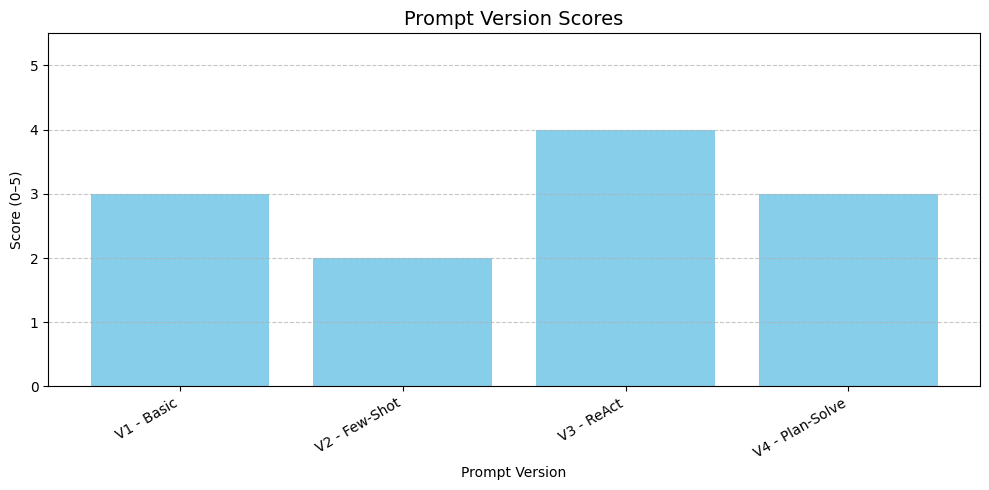

In [16]:
import matplotlib.pyplot as plt

# 📊 Bar Plot of Prompt Scores
def plot_scores(df):
    plt.figure(figsize=(10, 5))
    plt.bar(df["Version"], df["Score (0–5)"], color="skyblue")
    plt.ylim(0, 5.5)
    plt.title("Prompt Version Scores", fontsize=14)
    plt.xlabel("Prompt Version")
    plt.ylabel("Score (0–5)")
    plt.xticks(rotation=30, ha='right')
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()

# 🔁 Plot the results
plot_scores(eval_df)


In [ ]:

# # Optional: 
# import pandas as pd

# def get_evaluation_df(prompts):
#     """Runs evaluation, returns results as a pandas DataFrame (no CSV writing)."""
#     records = []
#     for row in prompts:
#         prompt = row["prompt"]
#         expected_keywords = row["expected_keywords"]
#         expected_tools = row["expected_tools"]

#         run_response = copilot.run(prompt)
#         response = run_response.content.strip()

#         accuracy, coherence, completeness, user_friendly, reasoning_used, score = score_response(
#             prompt, response, expected_keywords, expected_tools
#         )

#         records.append({
#             "Prompt": prompt,
#             "Response": response,
#             "Expected Keywords": ", ".join(expected_keywords),
#             "Expected Tools": ", ".join(expected_tools),
#             "Accuracy": "Yes" if accuracy else "No",
#             "Coherence": "Yes" if coherence else "No",
#             "Completeness": "Yes" if completeness else "No",
#             "User-Friendliness": "Yes" if user_friendly else "No",
#             "Reasoning Used": "Yes" if reasoning_used else "No",
#             "Score (0–5)": score
#         })
#     df = pd.DataFrame(records)
#     return df


In [ ]:
# df = get_evaluation_df(prompts)
# print("\n=== Evaluation Results Table ===")
# print(df[["Prompt", "Score (0–5)", "Accuracy", "Coherence", "Completeness", "User-Friendliness", "Reasoning Used"]])